Wisconsin (Original) dataset
Attribute Information:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

In [19]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [20]:
#Read data

wine_df = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
                                           "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", 
                                           "Proanthocyanins", "Color_intensity", 
                                           "Hue", "OD280", "Proline"])

In [21]:
wine_df.head(10)  

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [22]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Cultivator              178 non-null int64
Alchol                  178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity_of_Ash       178 non-null float64
Magnesium               178 non-null int64
Total_phenols           178 non-null float64
Falvanoids              178 non-null float64
Nonflavanoid_phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [23]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [24]:
wine_df['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [25]:
wine_df['Proline'].value_counts()

680     5
520     5
630     4
625     4
750     4
       ..
385     1
1020    1
392     1
720     1
502     1
Name: Proline, Length: 121, dtype: int64

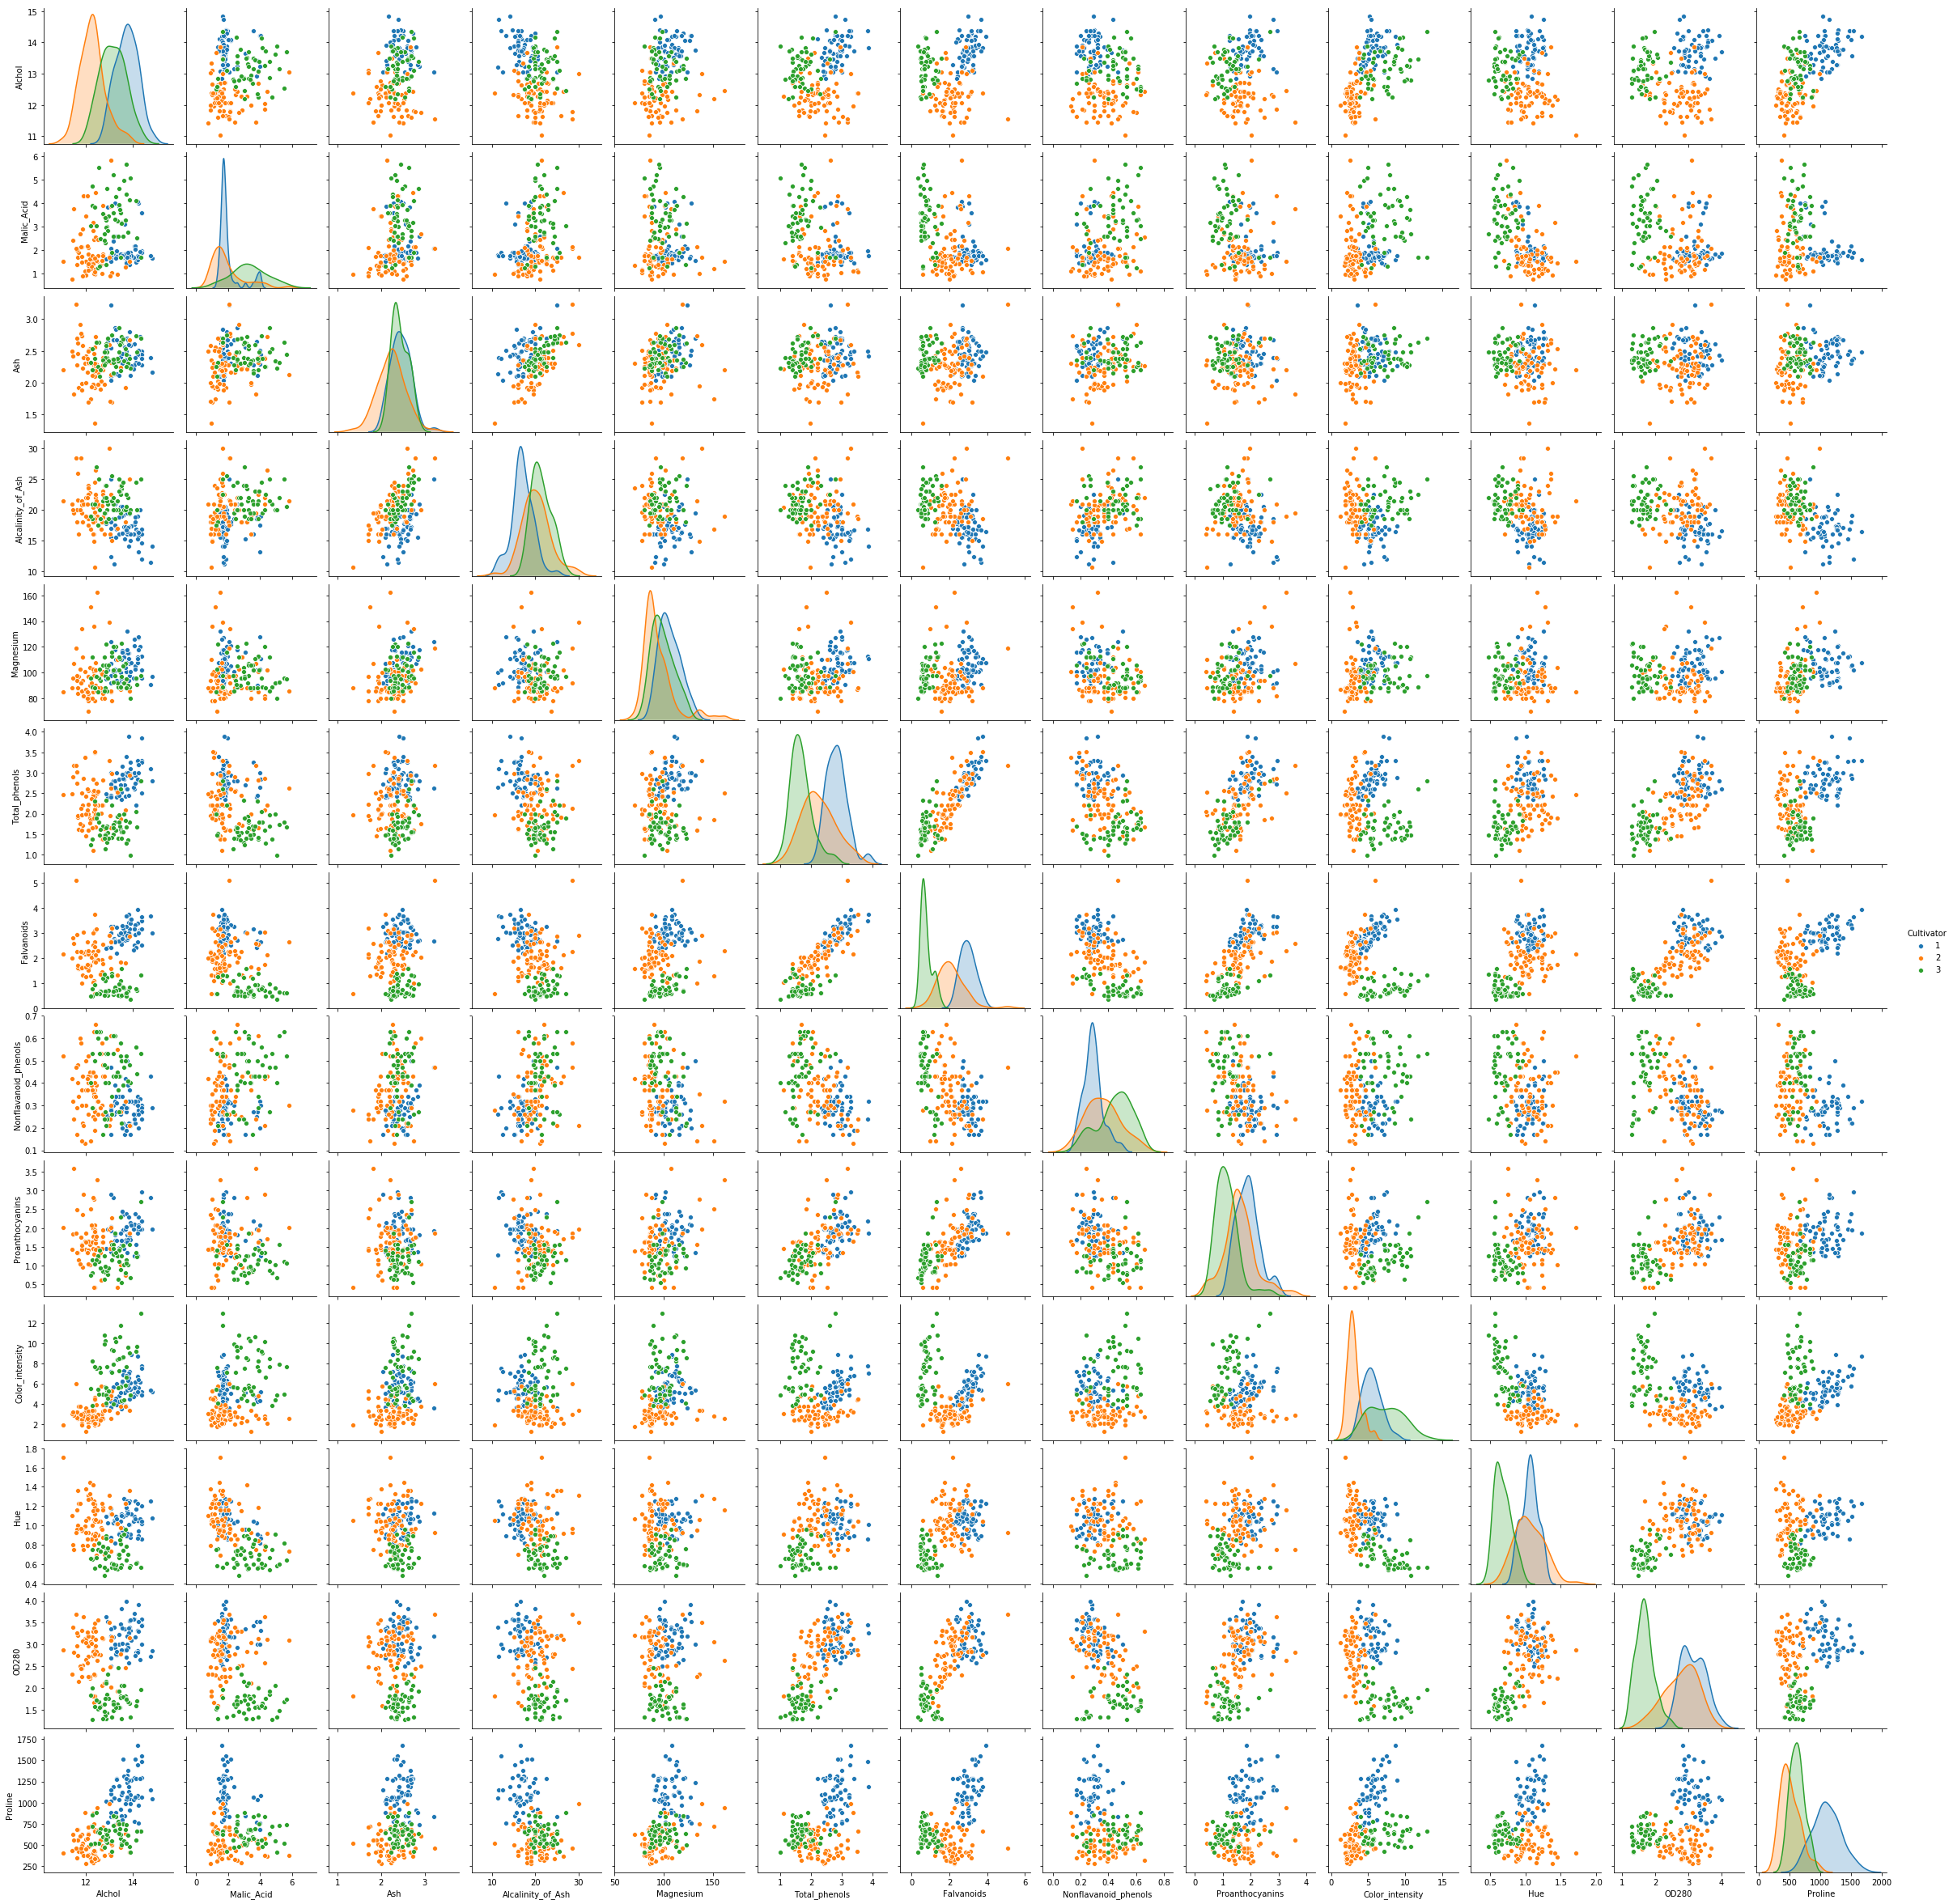

In [26]:
sns.pairplot(wine_df , diag_kind = "kde", hue="Cultivator")

In [36]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df["Cultivator"]

In [37]:
X.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# GaussianNB

In [39]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred = model.predict(X_test)

In [41]:
print(model.score(X_train , y_train))  
print(model.score(X_test , y_test))  
print(metrics.confusion_matrix(y_test, y_pred))

0.9838709677419355
0.9444444444444444
[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]


In [42]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



# MultinomialNB

In [44]:
# Invoking the MultinomialNB  function to create the model
# fitting the model in the training data set
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
y_pred = model.predict(X_test)

In [46]:
print(model.score(X_train , y_train))  
print(model.score(X_test , y_test))  
print(metrics.confusion_matrix(y_test, y_pred))

0.8870967741935484
0.8703703703703703
[[17  1  1]
 [ 1 19  2]
 [ 1  1 11]]


In [47]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.90      0.86      0.88        22
           3       0.79      0.85      0.81        13

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54

